In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	Abrir as imagens coloridas e mostrar a imagem e seus histogramas (separados) cada canal de cor. Considerar os seguintes sistemas de cores:
a.	RGB
b.	HSV ou HSI
c.	Lab


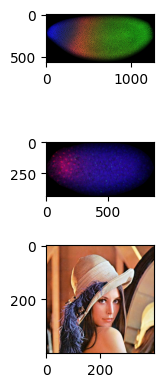

In [3]:
img1 = cv2.imread("image.jpg", cv2.IMREAD_COLOR)
img1RGB = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("image2.jpg", cv2.IMREAD_COLOR)
img2RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.imread("Lenna.jpg", cv2.IMREAD_COLOR)
img3RGB = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.subplot(3,4,1)
plt.imshow(img1RGB);
plt.subplot(3,4,4*1+1)
plt.imshow(img2RGB);
plt.subplot(3,4,4*2+1)
plt.imshow(img3RGB);


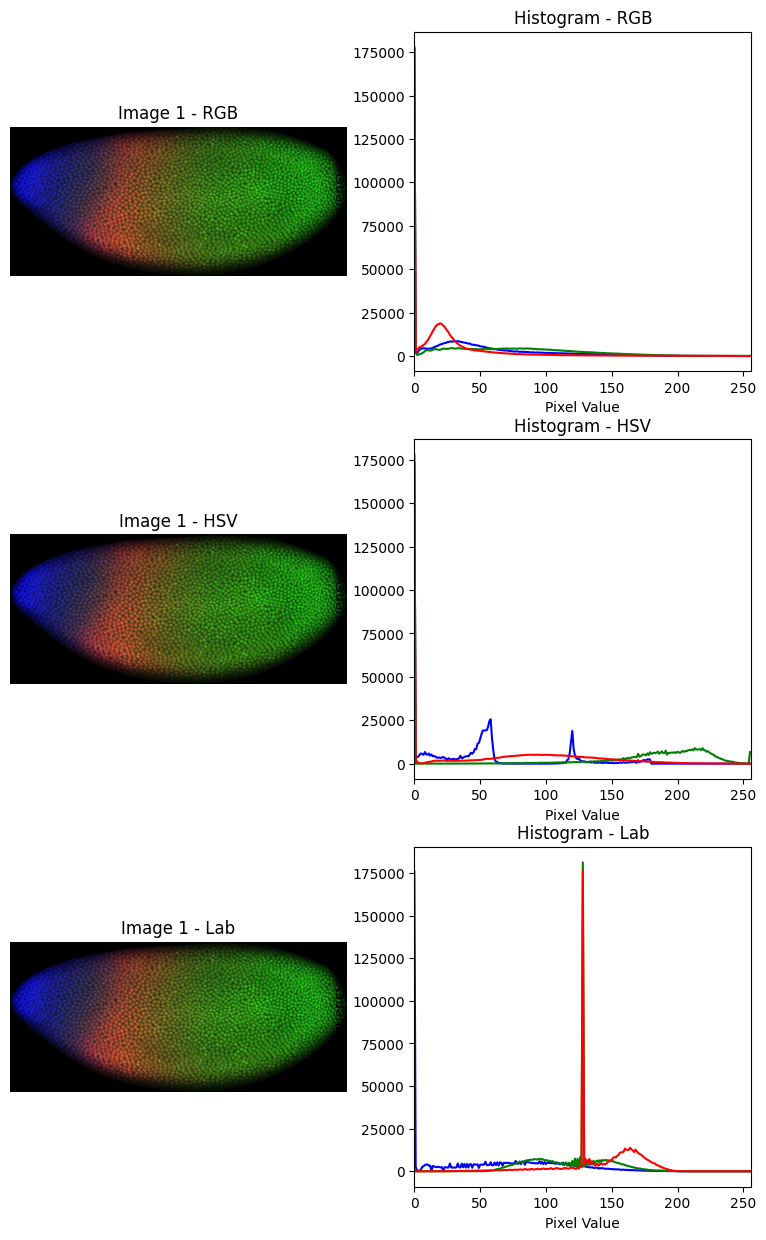

In [7]:
def plot_histogram(image, title):
    colors = ('b', 'g', 'r')
    for i, col in enumerate(colors):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=col)
        plt.xlim([0, 256])
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

# Carregar as imagens
img1 = cv2.imread("image.jpg", cv2.IMREAD_COLOR)
img2 = cv2.imread("image2.jpg", cv2.IMREAD_COLOR)
img3 = cv2.imread("Lenna.jpg", cv2.IMREAD_COLOR)

# Converter para diferentes espaços de cor
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
img3_hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)

img1_lab = cv2.cvtColor(img1, cv2.COLOR_BGR2Lab)
img2_lab = cv2.cvtColor(img2, cv2.COLOR_BGR2Lab)
img3_lab = cv2.cvtColor(img3, cv2.COLOR_BGR2Lab)

# Mostrar as imagens e seus histogramas para cada canal de cor
plt.figure(figsize=(20, 15))

# Imagem 1 - RGB
plt.subplot(3, 4, 1)
plt.imshow(img1_rgb)
plt.title('Image 1 - RGB')
plt.axis('off')
plt.subplot(3, 4, 2)
plot_histogram(img1_rgb, 'Histogram - RGB')

# Imagem 1 - HSV
plt.subplot(3, 4, 5)
plt.imshow(cv2.cvtColor(img1_hsv, cv2.COLOR_HSV2RGB))
plt.title('Image 1 - HSV')
plt.axis('off')
plt.subplot(3, 4, 6)
plot_histogram(img1_hsv, 'Histogram - HSV')

# Imagem 1 - Lab
plt.subplot(3, 4, 9)
plt.imshow(cv2.cvtColor(img1_lab, cv2.COLOR_Lab2RGB))
plt.title('Image 1 - Lab')
plt.axis('off')
plt.subplot(3, 4, 10)
plot_histogram(img1_lab, 'Histogram - Lab')

2)	Utilizando a imagem do mandrill, faça rotinas para detecção do focinho (região vermelha e azul). Utilize algum algoritmo de limiarização.

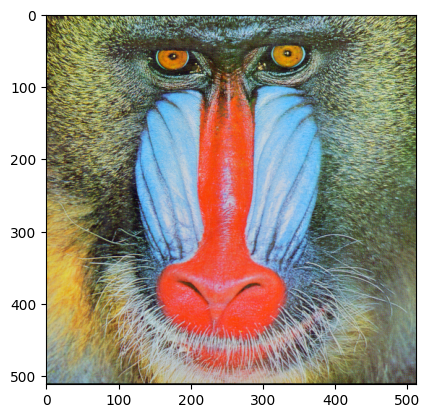

In [10]:
img_mand = cv2.imread("mandrill.tiff", cv2.IMREAD_COLOR)
img_mand_RGB = cv2.cvtColor(img_mand, cv2.COLOR_BGR2RGB)
plt.imshow(img_mand_RGB);


(-0.5, 511.5, 511.5, -0.5)

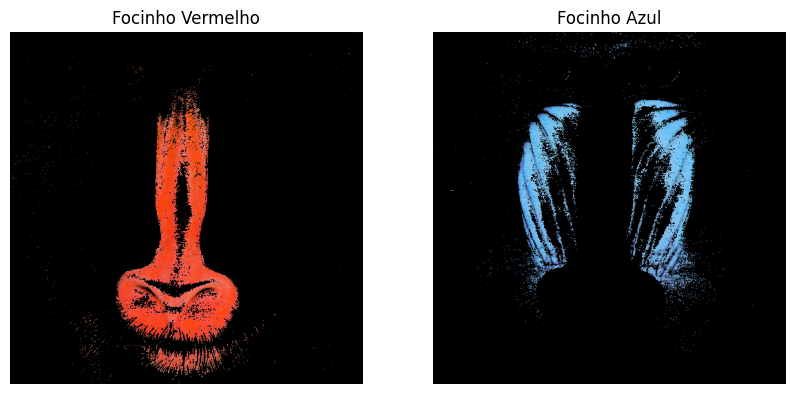

In [11]:
img_mand = cv2.imread("mandrill.tiff", cv2.IMREAD_COLOR)
img_mand_RGB = cv2.cvtColor(img_mand, cv2.COLOR_BGR2RGB)

# Converter para o espaço de cor HSV para facilitar a detecção de cores
img_mand_HSV = cv2.cvtColor(img_mand, cv2.COLOR_BGR2HSV)

# Definir os intervalos de cores para vermelho e azul em HSV
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])

# Criar máscaras para as regiões vermelhas e azuis
mask_red = cv2.inRange(img_mand_HSV, lower_red, upper_red)
mask_blue = cv2.inRange(img_mand_HSV, lower_blue, upper_blue)

# Aplicar as máscaras na imagem original
result_red = cv2.bitwise_and(img_mand_RGB, img_mand_RGB, mask=mask_red)
result_blue = cv2.bitwise_and(img_mand_RGB, img_mand_RGB, mask=mask_blue)

# Mostrar as imagens do focinho vermelho e azul
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(result_red)
plt.title('Focinho Vermelho')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_blue)
plt.title('Focinho Azul')
plt.axis('off')

3)	Utilizando a imagem HE.jpg, tente detectar e contar a quantidade de núcleos celulares (em azul). Aplicar o Ostu para os 9 canais de cores e avaliar qual foi melhor (R,G,B,H,S,V,L,a,b)

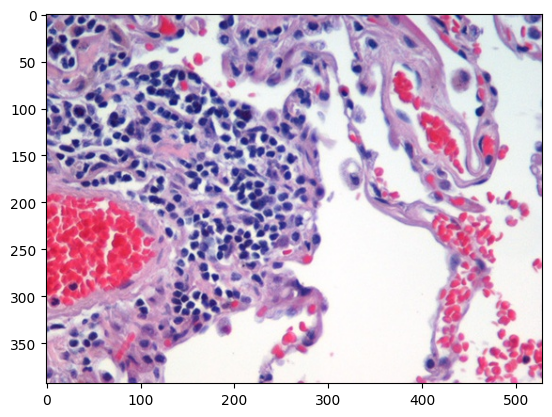

In [15]:
img_he = cv2.imread("HE.jpg", cv2.IMREAD_COLOR)
img_he_RGB = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)
plt.imshow(img_he_RGB);

O canal com melhor resultado é 'S' com 444 núcleos celulares.


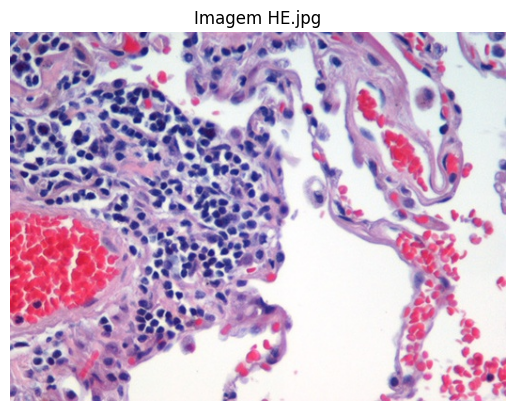

Text(0, 0.5, 'Quantidade de núcleos celulares')

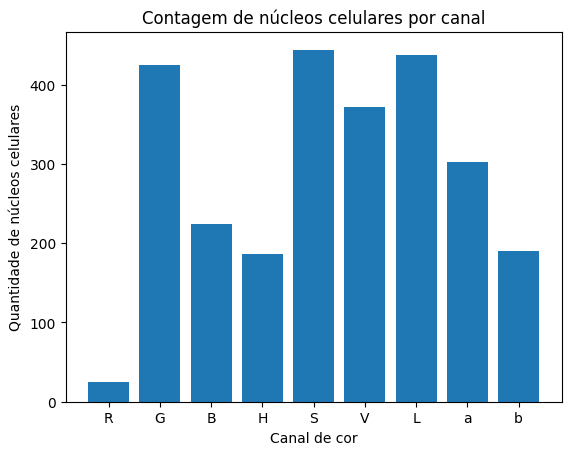

In [12]:
# Carregar a imagem HE.jpg
img_he = cv2.imread("HE.jpg", cv2.IMREAD_COLOR)
img_he_RGB = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)

# Converter para diferentes espaços de cor
img_he_HSV = cv2.cvtColor(img_he, cv2.COLOR_BGR2HSV)
img_he_Lab = cv2.cvtColor(img_he, cv2.COLOR_BGR2Lab)

# Definir os canais de cores
channels = {
    'R': img_he_RGB[:, :, 0],
    'G': img_he_RGB[:, :, 1],
    'B': img_he_RGB[:, :, 2],
    'H': img_he_HSV[:, :, 0],
    'S': img_he_HSV[:, :, 1],
    'V': img_he_HSV[:, :, 2],
    'L': img_he_Lab[:, :, 0],
    'a': img_he_Lab[:, :, 1],
    'b': img_he_Lab[:, :, 2]
}

# Função para aplicar limiarização de Otsu e contar os núcleos celulares
def count_nuclei(image):
    _, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return len(contours)

# Aplicar limiarização de Otsu em cada canal e contar os núcleos
results = {}
for channel_name, channel_image in channels.items():
    nuclei_count = count_nuclei(channel_image)
    results[channel_name] = nuclei_count

# Encontrar o canal com o melhor resultado (maior contagem de núcleos)
best_channel = max(results, key=results.get)
best_count = results[best_channel]

print(f"O canal com melhor resultado é '{best_channel}' com {best_count} núcleos celulares.")

# Visualizar a imagem original e os resultados da contagem
plt.imshow(img_he_RGB)
plt.title('Imagem HE.jpg')
plt.axis('off')
plt.show()

# Exibir os resultados da contagem para cada canal
plt.bar(results.keys(), results.values())
plt.title('Contagem de núcleos celulares por canal')
plt.xlabel('Canal de cor')
plt.ylabel('Quantidade de núcleos celulares')